In [1]:
import alpaca_trade_api as alpaca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import hvplot.pandas

# Replace YOUR_API_KEY and YOUR_API_SECRET with your Alpaca API key and secret
alpaca_api = alpaca.REST('PKU5LEIDZZV83Y5ENASI', 'nvzOwJpyvr73GTitTDyga0MkI2Qd6RsK4PmhItbu', api_version='v2')

# Set the ticker symbol and time frame
ticker = "AAPL"
timeframe = "1Day"

# Set the start and end dates for the data
start_date = "2012-01-01T00:00:00-00:00"
end_date = "2022-01-01T00:00:00-00:00"

# Retrieve the data
data = alpaca_api.get_bars(ticker,  timeframe, start_date, end_date).df

# Convert the data to a Pandas dataframe
df = pd.DataFrame(data)

# Calculate the 3 period moving average of the close
df['Mid']=(df['high']+df['low'])/2
#df['Mid']=df['high']
df['3MA'] = df['close'].rolling(3).mean()

df['2MA'] = df['close'].rolling(2).mean()

# Calculate the 10 period moving average of the close
df['10MA'] = df['close'].rolling(10).mean()

# Calculate the 20 period moving average of the close
#df['20MA'] = df['close'].rolling(20).mean()

df['Diff']=df['3MA']-df['10MA']

df['3MASlope']=df['3MA'].pct_change()
df['2MASlope']=df['2MA'].pct_change()
df['10MASlope']=df['10MA'].pct_change()
df['vwap']=df['vwap'].pct_change()
df['CloseDiff3MA']=df['close']/df['3MA']
df['open']=df['open'].pct_change().shift(-1)
df['close']=df['close'].pct_change().shift(-1)
df['Mid']=df['Mid'].pct_change()
df=df.drop(columns=['high','low','volume','trade_count'])
df['FutureMid']=df['Mid'].shift(-1)
           
df["Signal"] = 0.0
           



In [2]:
for index, row in df.iterrows():
    if row["Mid"] >= 0:
       df.loc[index, "Signal"] = 1.0
    if row["Mid"] < 0:
        df.loc[index,"Signal"] = -1.0

'''for index, row in df.iterrows():
    if row["close"] >= 0:
       df.loc[index, "Signal"] = 1.0
    if row["close"] < 0:
        df.loc[index,"Signal"] = 0'''
        
'''for index, row in df.iterrows():
    if row["vwap"] >= 0:
       df.loc[index, "Signal"] = 1.0
    if row["vwap"] < 0:
        df.loc[index,"Signal"] = 0.0'''
        
# Calculate the points in time at which a position should be taken, 1 or -1
#ema_signals_df['Crossover']= ema_signals_df['Signal'].diff()
#ema_signals_df=ema_signals_df.dropna()
#ema_signals_df['Crossover']=ema_signals_df['Crossover'].shift(-8)
df["Signal"]=df["Signal"].shift(-1)
df['FutureSlope']=df["close"].shift(-1)

'''ema_signals_df['Crossover']=ema_signals_df['Signal'].diff()
# Review the DataFrame
#ema_signals_df=ema_signals_df['Crossover'].dropna()
ema_signals_df=ema_signals_df.dropna()'''
df.tail(10)

,close,open,vwap,Mid,3MA,2MA,10MA,Diff,3MASlope,2MASlope,10MASlope,CloseDiff3MA,FutureMid,Signal,FutureSlope
timestamp,,,,,,,,,,,,,,,
2021-12-17 05:00:00+00:00,-0.008122,-0.009710,-0.017954,-0.024809,174.233333,171.700,173.836,0.397333,-0.006066,-0.023211,0.005379,0.982246,-0.014920,-1.0,0.019087
2021-12-20 05:00:00+00:00,0.019087,0.019432,-0.011124,-0.014920,171.050000,170.445,174.279,-3.229000,-0.018271,-0.007309,0.002548,0.992400,0.012661,1.0,0.015319
2021-12-21 05:00:00+00:00,0.015319,0.008686,0.013512,0.012661,171.293333,171.370,174.460,-3.166667,0.001423,0.005427,0.001039,1.009905,0.016622,1.0,0.003644
2021-12-22 05:00:00+00:00,0.003644,0.016239,0.016429,0.016622,172.793333,174.315,174.516,-1.722667,0.008757,0.017185,0.000321,1.016474,0.011810,1.0,0.022975
2021-12-23 05:00:00+00:00,0.022975,0.007023,0.010118,0.011810,174.970000,175.960,174.688,0.282000,0.012597,0.009437,0.000986,1.007487,0.015251,1.0,-0.005767
2021-12-27 05:00:00+00:00,-0.005767,0.017365,0.016845,0.015251,177.416667,178.305,174.776,2.640667,0.013983,0.013327,0.000504,1.016421,0.006630,1.0,0.000502
2021-12-28 05:00:00+00:00,0.000502,-0.004607,0.003194,0.006630,178.633333,179.810,175.131,3.502333,0.006858,0.008441,0.002031,1.003676,-0.003029,-1.0,-0.006578
2021-12-29 05:00:00+00:00,-0.006578,0.000781,-0.001347,-0.003029,179.666667,179.335,175.636,4.030667,0.005785,-0.002642,0.002884,0.998404,-0.000307,-1.0,-0.003535
2021-12-30 05:00:00+00:00,-0.003535,-0.007717,-0.000664,-0.000307,178.956667,178.790,175.526,3.430667,-0.003952,-0.003039,-0.000626,0.995772,-0.006050,-1.0,NaN


In [3]:
#display(df.hvplot.scatter(y='CloseDiff3MA',x='3MASlope'))

lstColumns=df.columns

display(lstColumns)

dfopt=pd.DataFrame()

for column in lstColumns:
    display(df.hvplot.scatter(y='FutureMid',x=column))
    dfopt=df[['FutureMid',column]]
    display(dfopt.corr())

Index(['close', 'open', 'vwap', 'Mid', '3MA', '2MA', '10MA', 'Diff',
       '3MASlope', '2MASlope', '10MASlope', 'CloseDiff3MA', 'FutureMid',
       'Signal', 'FutureSlope'],
      dtype='object')

:Scatter   [close]   (FutureMid)

,FutureMid,close
FutureMid,1.000000,0.896017
close,0.896017,1.000000


:Scatter   [open]   (FutureMid)

,FutureMid,open
FutureMid,1.000000,0.913426
open,0.913426,1.000000


:Scatter   [vwap]   (FutureMid)

,FutureMid,vwap
FutureMid,1.000000,0.067026
vwap,0.067026,1.000000


:Scatter   [Mid]   (FutureMid)

,FutureMid,Mid
FutureMid,1.00000,0.03352
Mid,0.03352,1.00000


:Scatter   [3MA]   (FutureMid)

,FutureMid,3MA
FutureMid,1.000000,-0.059417
3MA,-0.059417,1.000000


:Scatter   [2MA]   (FutureMid)

,FutureMid,2MA
FutureMid,1.000000,-0.057361
2MA,-0.057361,1.000000


:Scatter   [10MA]   (FutureMid)

,FutureMid,10MA
FutureMid,1.000000,-0.071588
10MA,-0.071588,1.000000


:Scatter   [Diff]   (FutureMid)

,FutureMid,Diff
FutureMid,1.000000,0.051042
Diff,0.051042,1.000000


:Scatter   [3MASlope]   (FutureMid)

,FutureMid,3MASlope
FutureMid,1.000000,0.078397
3MASlope,0.078397,1.000000


:Scatter   [2MASlope]   (FutureMid)

,FutureMid,2MASlope
FutureMid,1.000000,0.067537
2MASlope,0.067537,1.000000


:Scatter   [10MASlope]   (FutureMid)

,FutureMid,10MASlope
FutureMid,1.000000,0.039774
10MASlope,0.039774,1.000000


:Scatter   [CloseDiff3MA]   (FutureMid)

,FutureMid,CloseDiff3MA
FutureMid,1.000000,0.076436
CloseDiff3MA,0.076436,1.000000


:Scatter   [FutureMid]   (FutureMid)

,FutureMid,FutureMid
FutureMid,1.0,1.0
FutureMid,1.0,1.0


:Scatter   [Signal]   (FutureMid)

,FutureMid,Signal
FutureMid,1.000000,0.450416
Signal,0.450416,1.000000


:Scatter   [FutureSlope]   (FutureMid)

,FutureMid,FutureSlope
FutureMid,1.000000,-0.055123
FutureSlope,-0.055123,1.000000


In [4]:
df=df.dropna()

y = df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    858
-1.0    641
Name: count, dtype: int64

In [5]:
df

,close,open,vwap,Mid,3MA,2MA,10MA,Diff,3MASlope,2MASlope,10MASlope,CloseDiff3MA,FutureMid,Signal,FutureSlope
timestamp,,,,,,,,,,,,,,,
2016-01-19 05:00:00+00:00,0.001345,-0.033635,0.001902,0.005594,97.770000,96.895,98.601,-0.831000,-0.002483,-0.014544,-0.008736,0.988647,-0.013084,-1.0,-0.005063
2016-01-20 05:00:00+00:00,-0.005063,0.020610,-0.016461,-0.013084,96.860000,96.725,98.009,-1.149000,-0.009308,-0.001754,-0.006004,0.999277,0.006316,1.0,0.053167
2016-01-21 05:00:00+00:00,0.053167,0.016176,0.014087,0.006316,96.583333,96.545,97.569,-0.985667,-0.002856,-0.001861,-0.004489,0.997066,0.036355,1.0,-0.019523
2016-01-22 05:00:00+00:00,-0.019523,0.029301,0.035547,0.036355,98.170000,98.860,98.066,0.104000,0.016428,0.023978,0.005094,1.033106,0.004554,1.0,0.005531
2016-01-25 05:00:00+00:00,0.005531,-0.015662,0.002704,0.004554,99.053333,100.430,98.314,0.739333,0.008998,0.015881,0.002529,1.003904,-0.008917,-1.0,-0.065707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22 05:00:00+00:00,0.003644,0.016239,0.016429,0.016622,172.793333,174.315,174.516,-1.722667,0.008757,0.017185,0.000321,1.016474,0.011810,1.0,0.022975
2021-12-23 05:00:00+00:00,0.022975,0.007023,0.010118,0.011810,174.970000,175.960,174.688,0.282000,0.012597,0.009437,0.000986,1.007487,0.015251,1.0,-0.005767
2021-12-27 05:00:00+00:00,-0.005767,0.017365,0.016845,0.015251,177.416667,178.305,174.776,2.640667,0.013983,0.013327,0.000504,1.016421,0.006630,1.0,0.000502


In [6]:
# Select the start of the training period

from datetime import datetime
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

X = df[['10MASlope','2MASlope','CloseDiff3MA']].dropna()




training_begin = X.index.min()

# Display the training begin date
print(training_begin)

training_end = X.index.min() + DateOffset(months=48)

# Display the training end date
print(training_end)

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
display(X_train.head())
display(X_train.tail())

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

display(X_test_scaled)

2016-01-19 05:00:00+00:00
2020-01-19 05:00:00+00:00


,10MASlope,2MASlope,CloseDiff3MA
timestamp,,,
2016-01-19 05:00:00+00:00,-0.008736,-0.014544,0.988647
2016-01-20 05:00:00+00:00,-0.006004,-0.001754,0.999277
2016-01-21 05:00:00+00:00,-0.004489,-0.001861,0.997066
2016-01-22 05:00:00+00:00,0.005094,0.023978,1.033106
2016-01-25 05:00:00+00:00,0.002529,0.015881,1.003904


,10MASlope,2MASlope,CloseDiff3MA
timestamp,,,
2020-01-13 05:00:00+00:00,0.009071,0.011823,1.014900
2020-01-14 05:00:00+00:00,0.007004,0.003746,0.997947
2020-01-15 05:00:00+00:00,0.005814,-0.008926,0.992603
2020-01-16 05:00:00+00:00,0.004866,0.004102,1.006878
2020-01-17 05:00:00+00:00,0.006927,0.011794,1.011509


array([[ 0.87033366,  0.0807744 , -0.17965896],
       [ 1.03043137, -0.26182776, -0.09410341],
       [ 0.81021394,  0.2738448 ,  0.28108827],
       ...,
       [-0.1293154 ,  1.11516585,  1.33304066],
       [ 0.18150594,  0.66505049,  0.21826095],
       [ 0.3549618 , -0.35582444, -0.24284331]])

In [7]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC(probability=True) 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.67      0.40      0.50       225
         1.0       0.62      0.83      0.71       266

    accuracy                           0.63       491
   macro avg       0.64      0.62      0.60       491
weighted avg       0.64      0.63      0.61       491



In [8]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

model=logModel.fit(X_train_scaled, y_train)
log_pred=logModel.predict(X_test_scaled)

log_testing_report = classification_report(y_test, log_pred)

print(log_testing_report)


              precision    recall  f1-score   support

        -1.0       0.65      0.42      0.51       225
         1.0       0.62      0.81      0.70       266

    accuracy                           0.63       491
   macro avg       0.64      0.62      0.61       491
weighted avg       0.64      0.63      0.62       491



In [9]:
4991/9151

0.5454048737842858

In [10]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = svm_pred

predictions_df["actual_returns"] = df["vwap"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
predictions_df.head()

predicted_signal
 1.0    358
-1.0    133
Name: count, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
timestamp,,,
2020-01-21 05:00:00+00:00,1.0,0.003688,0.003688
2020-01-22 05:00:00+00:00,1.0,-0.000507,-0.000507
2020-01-23 05:00:00+00:00,1.0,0.006369,0.006369
2020-01-24 05:00:00+00:00,1.0,-0.033233,-0.033233
2020-01-27 05:00:00+00:00,-1.0,0.023827,-0.023827


<Axes: xlabel='timestamp'>

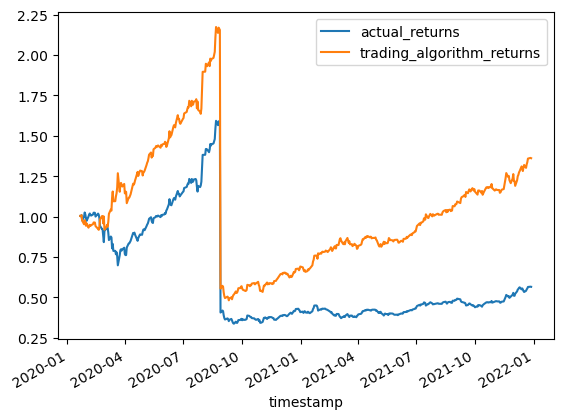

In [11]:
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [12]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = svm_pred

predictions_df["actual_returns"] = df["vwap"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
predictions_df.head()

predicted_signal
 1.0    358
-1.0    133
Name: count, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
timestamp,,,
2020-01-21 05:00:00+00:00,1.0,0.003688,0.003688
2020-01-22 05:00:00+00:00,1.0,-0.000507,-0.000507
2020-01-23 05:00:00+00:00,1.0,0.006369,0.006369
2020-01-24 05:00:00+00:00,1.0,-0.033233,-0.033233
2020-01-27 05:00:00+00:00,-1.0,0.023827,-0.023827


<Axes: xlabel='timestamp'>

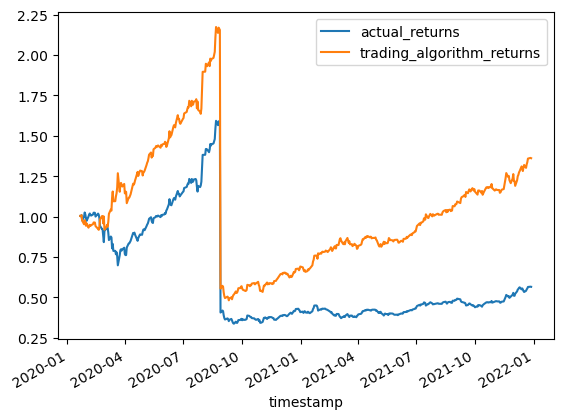

In [13]:
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

c:\Users\nihar\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


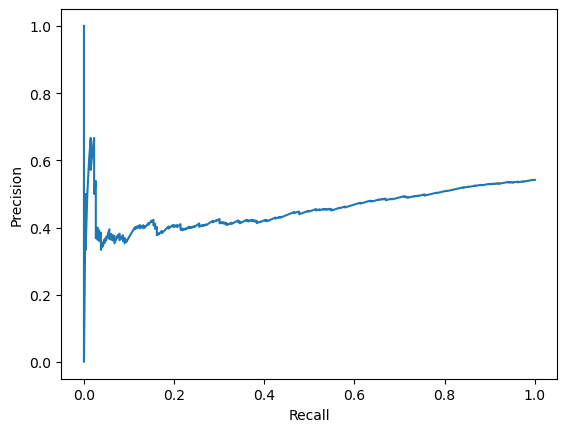

C:\Users\nihar\AppData\Local\Temp\ipykernel_33860\988179411.py:17: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


IndexError: index 491 is out of bounds for axis 0 with size 491

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np


y_probs = svm_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Find the threshold with the highest F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(precision)
best_threshold = thresholds[best_threshold_index]

# Make predictions with the best threshold
y_pred = (y_probs <= best_threshold).astype(int)

In [ ]:
print(best_threshold)

print(np.argmax(precision))

svm_testing_report = classification_report(y_test, y_pred)

# Print the classification report
print(svm_testing_report)

In [ ]:
X_test

In [ ]:
for x in range(1,100,1):
    threshold=float(x)/100
    print(threshold)
    y_pred = (y_probs >= threshold).astype(int)
    svm_testing_report = classification_report(y_test, y_pred)

    # Print the classification report
    print(svm_testing_report)
    
    